# Alucar - Analisando as Vendas

In [3]:
import pandas as pd

In [4]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
alucar = pd.read_csv('alucar.csv')

In [6]:
print('Quantidade de linhas e colunas: ', alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [7]:
print('Quantidade de dados nulos: ', alucar.isna().sum().sum())

Quantidade de dados nulos:  0


In [8]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [9]:
# converter a coluna mes para o tipo datetime
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [10]:
!pip install seaborn
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
print(sns.__version__)

0.11.2


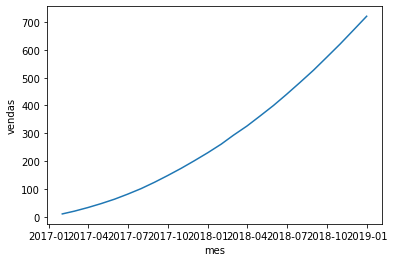

In [12]:
sns.lineplot(x='mes', y='vendas', data=alucar)

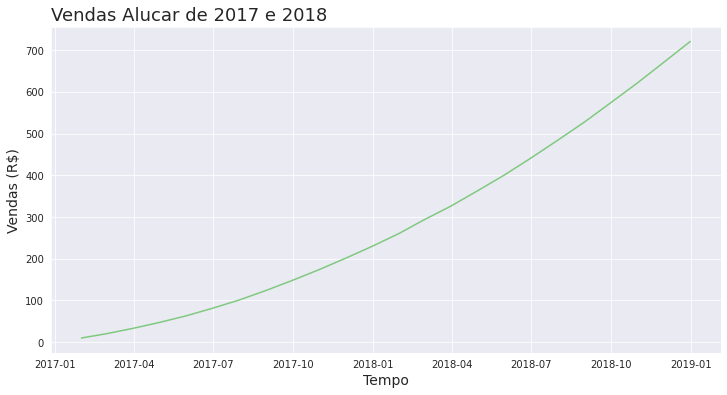

In [13]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [14]:
alucar.head(5)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [15]:
# decompor as vendas
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


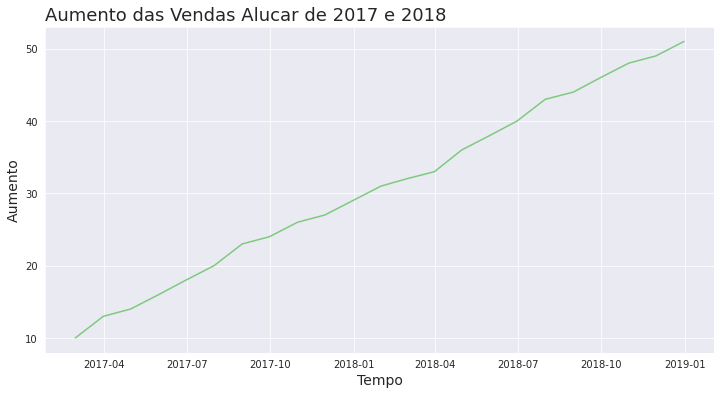

In [16]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [17]:
#criando uma função para plotar
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

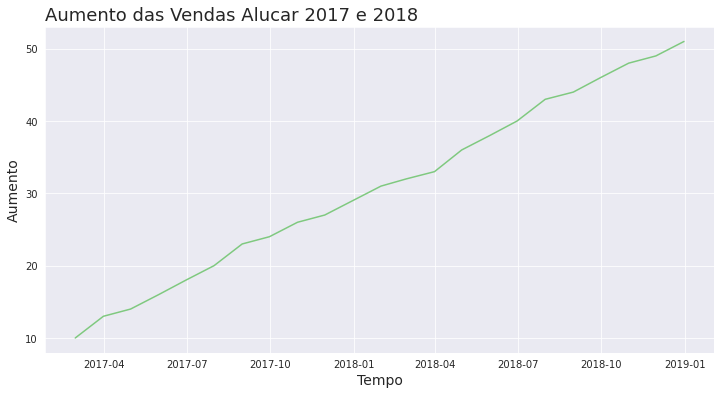

In [18]:
plotar('Aumento das Vendas Alucar 2017 e 2018','Tempo','Aumento','mes','aumento',alucar)

In [19]:
alucar['aceleracao'] = alucar['aumento'].diff()

In [20]:
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


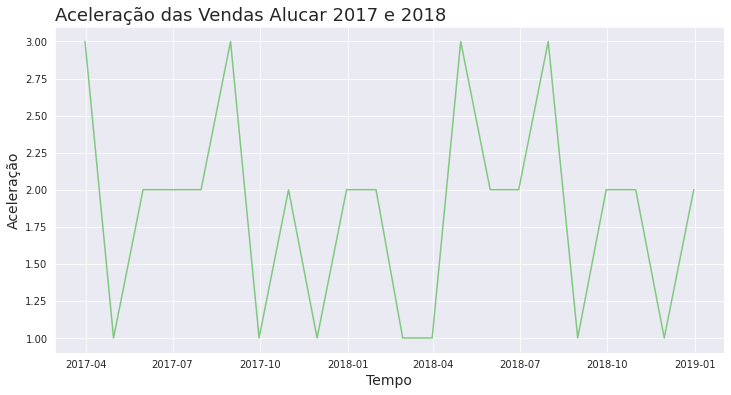

In [21]:
plotar('Aceleração das Vendas Alucar 2017 e 2018','Tempo','Aceleração','mes','aceleracao',alucar)

In [22]:
# crescimento em percentual relativo a observação anterior
alucar['Crescimento Vendas %'] = alucar['vendas'].pct_change()
alucar.head()

,mes,vendas,aumento,aceleracao,Crescimento Vendas %
0,2017-01-31,10,NaN,NaN,NaN
1,2017-02-28,20,10.0,NaN,1.000000
2,2017-03-31,33,13.0,3.0,0.650000
3,2017-04-30,47,14.0,1.0,0.424242
4,2017-05-31,63,16.0,2.0,0.340426


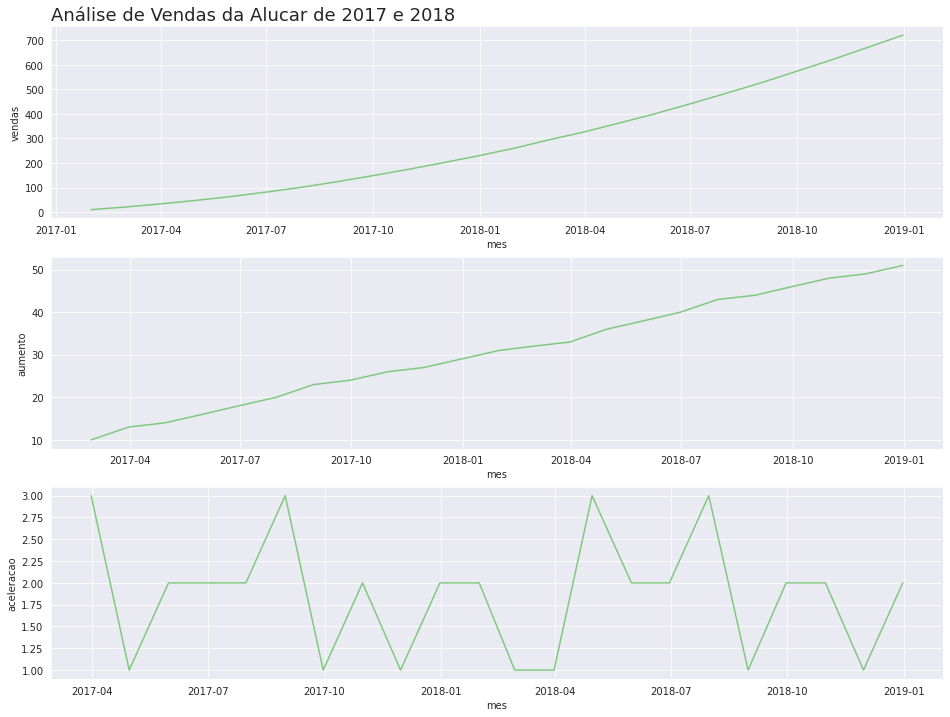

In [23]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de Vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [24]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

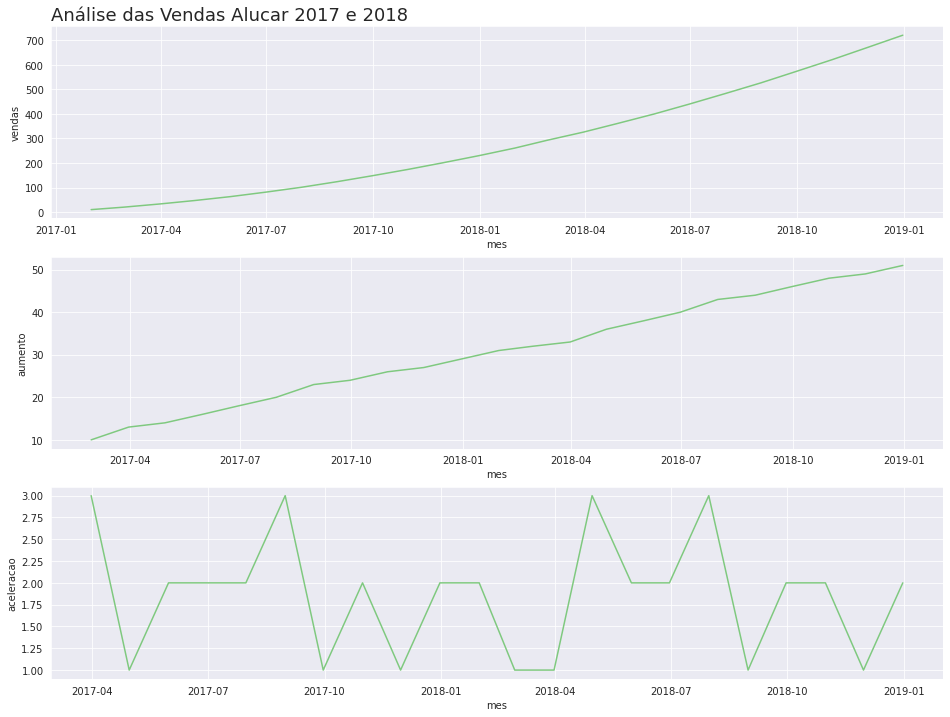

In [25]:
plot_comparacao('mes', 'vendas','aumento','aceleracao',alucar,'Análise das Vendas Alucar 2017 e 2018')

In [26]:
# função de autocorrelação (nível máximo = 1 e nível mínimo = -1)
from pandas.plotting import autocorrelation_plot

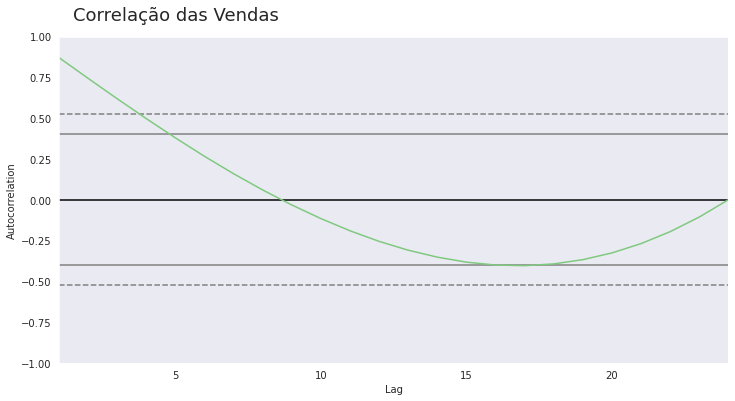

In [27]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

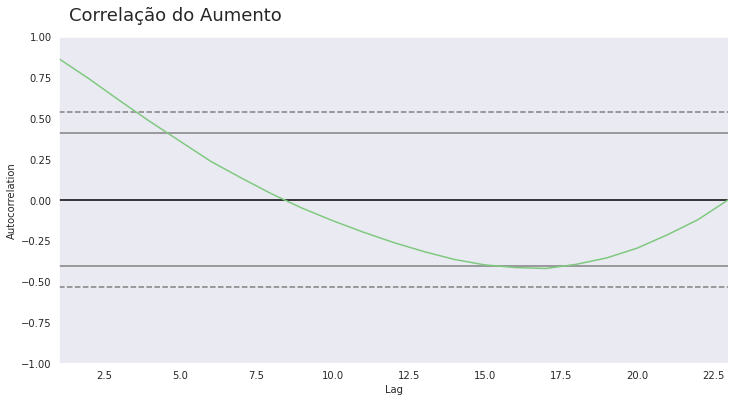

In [28]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

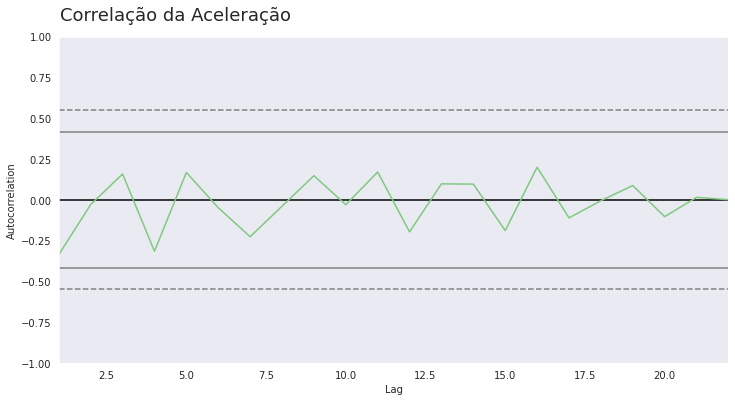

In [29]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando Assinantes da Newsletter

In [30]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [31]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [32]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [33]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [34]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


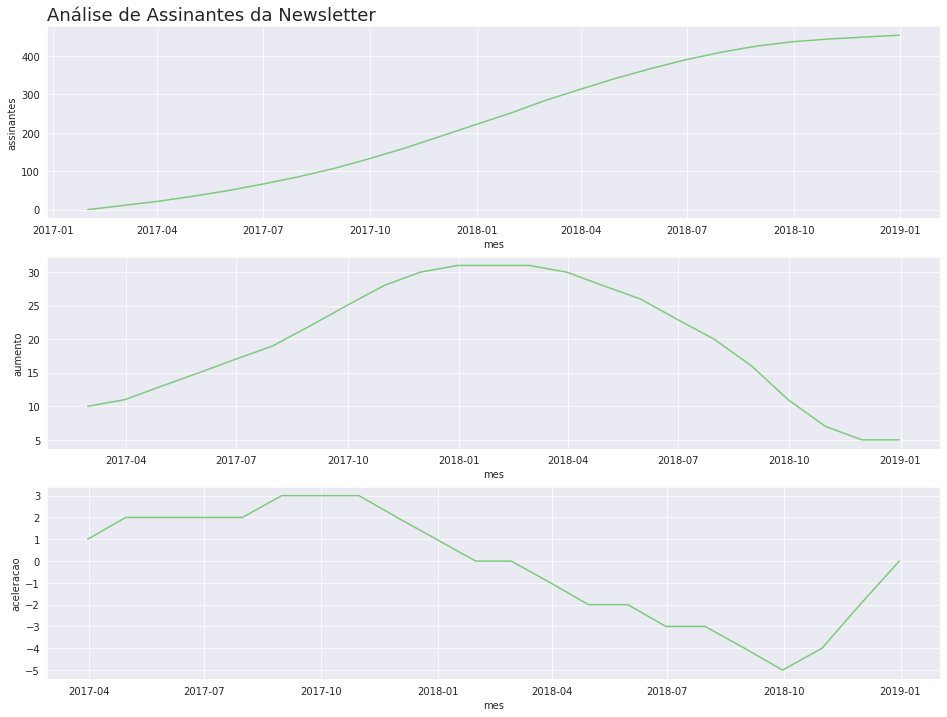

In [35]:
plot_comparacao('mes','assinantes','aumento','aceleracao',assinantes,'Análise de Assinantes da Newsletter')

# Chocolura - Analisando as Vendas

In [36]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [37]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [38]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [39]:
print('Quantidade de linhas e colunas:', chocolura.shape)
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [40]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


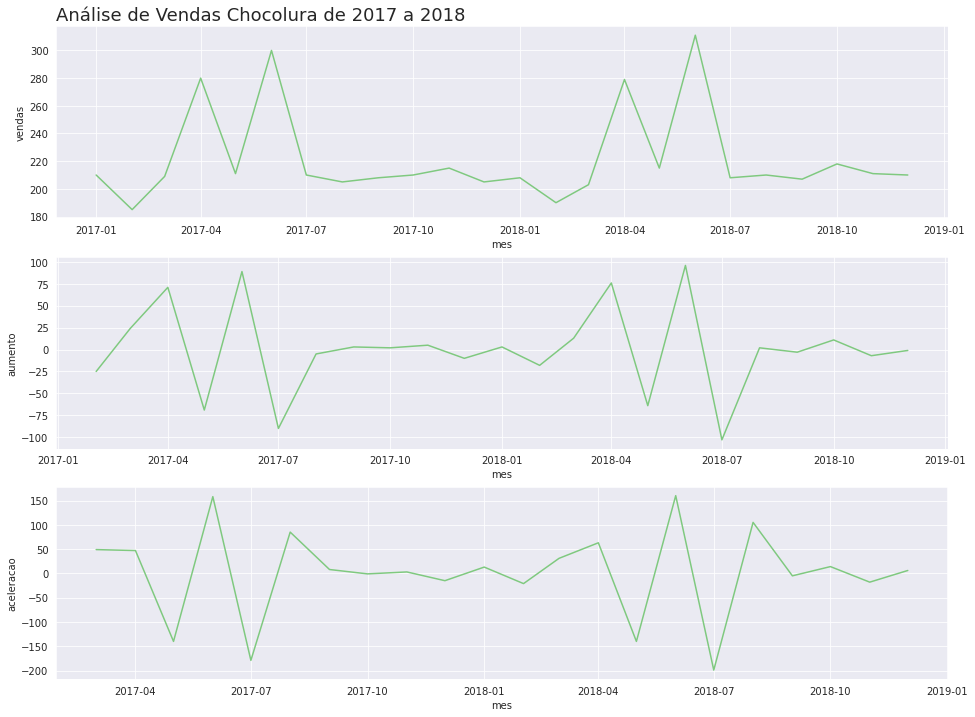

In [41]:
plot_comparacao('mes','vendas','aumento','aceleracao',chocolura,'Análise de Vendas Chocolura de 2017 a 2018')

Podemos observar uma sazonalidade entre os meses 04 e 07

# Chocolura - Vendas Diárias (Out e Nov)

In [42]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [43]:
print('Quantidade de linhas e colunas:', vendas_por_dia.shape)
print('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [44]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [45]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [46]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [47]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


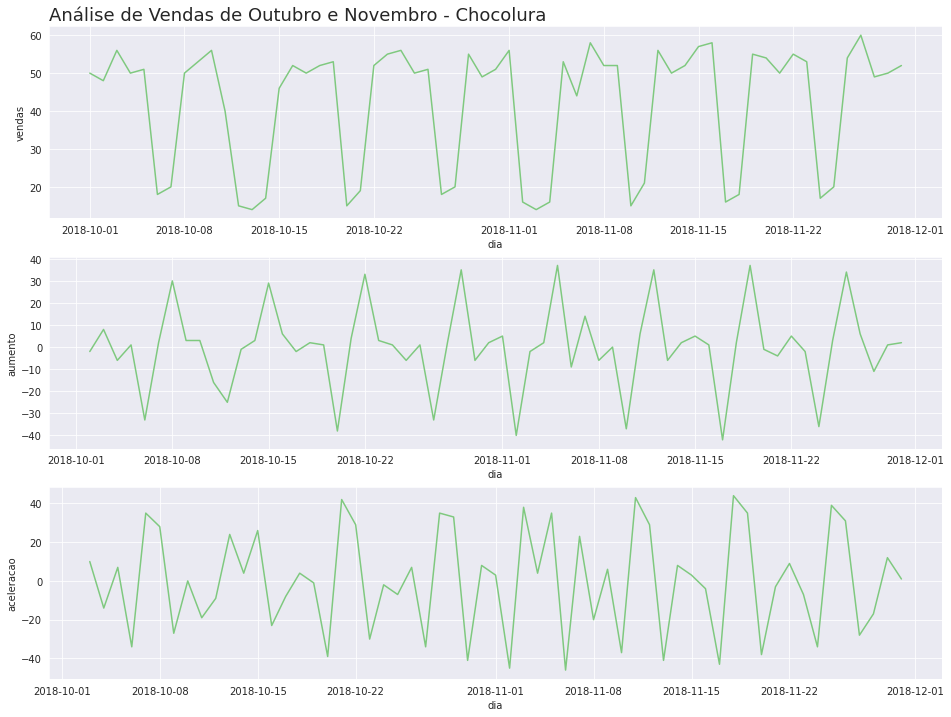

In [48]:
plot_comparacao('dia','vendas','aumento','aceleracao',vendas_por_dia,'Análise de Vendas de Outubro e Novembro - Chocolura')

**Analisando a Sazonalidade**

In [49]:
# criando coluna de dia da semana
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [50]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [51]:
dias_traduzidos = {
    'Monday': 'segunda',
    'Tuesday': 'terca',
    'Wednesday': 'quarta',
    'Thursday': 'quinta',
    'Friday': 'sexta',
    'Saturday': 'sabado',
    'Sunday': 'domingo'
}

In [52]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,segunda
1,2018-10-02,48,-2.0,NaN,terca
2,2018-10-03,56,8.0,10.0,quarta
3,2018-10-04,50,-6.0,-14.0,quinta
4,2018-10-05,51,1.0,7.0,sexta
5,2018-10-06,18,-33.0,-34.0,sabado
6,2018-10-07,20,2.0,35.0,domingo
7,2018-10-08,50,30.0,28.0,segunda
8,2018-10-09,53,3.0,-27.0,terca
9,2018-10-10,56,3.0,0.0,quarta


**Agrupando os dias**

In [53]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [54]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
domingo,19.0,3.0,31.0
quarta,53.0,1.0,2.0
quinta,51.0,-2.0,-3.0
sabado,16.0,-28.0,-20.0
segunda,52.0,34.0,31.0
sexta,45.0,-7.0,-5.0
terca,52.0,-1.0,-34.0


**Correlação das Vendas Diárias**

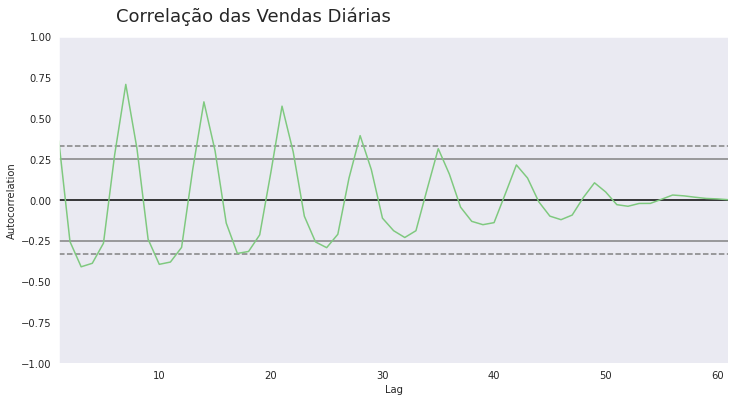

In [55]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas Diárias', fontsize=18, x=0.35,y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

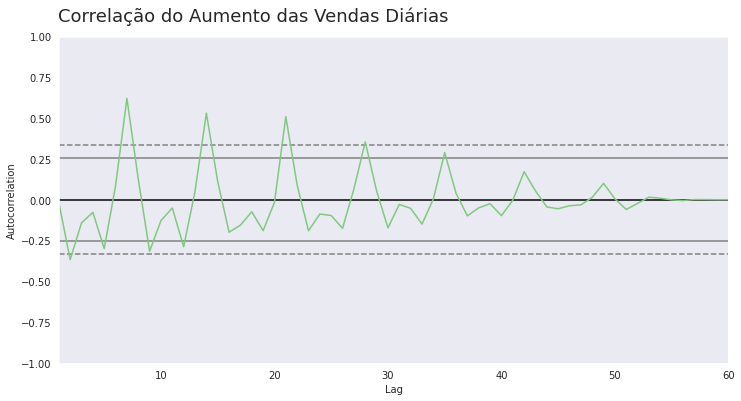

In [56]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento das Vendas Diárias', fontsize=18, x=0.35,y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

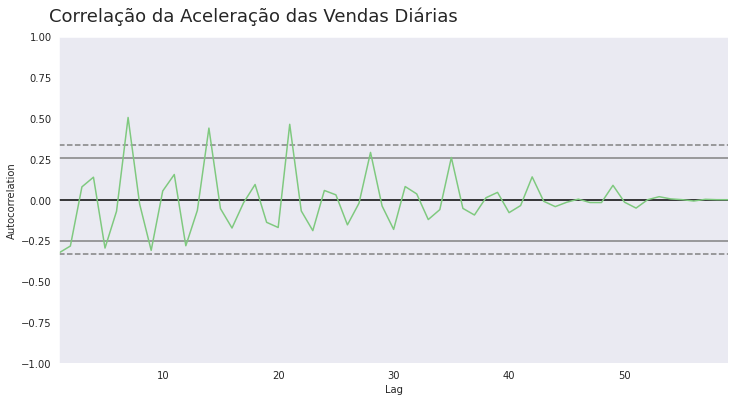

In [57]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração das Vendas Diárias', fontsize=18, x=0.35,y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Análise de Vendas

In [58]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [59]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [60]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [61]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


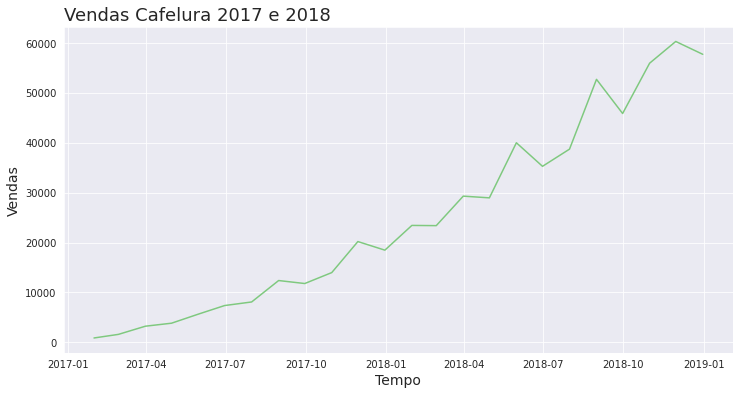

In [62]:
plotar('Vendas Cafelura 2017 e 2018', 'Tempo', 'Vendas','mes','vendas',cafelura)

In [63]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [64]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [65]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


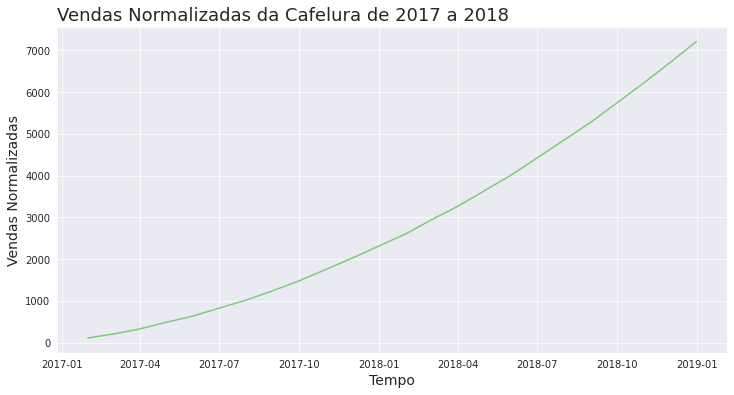

In [66]:
plotar('Vendas Normalizadas da Cafelura de 2017 a 2018','Tempo','Vendas Normalizadas','mes','vendas_normalizadas',cafelura)

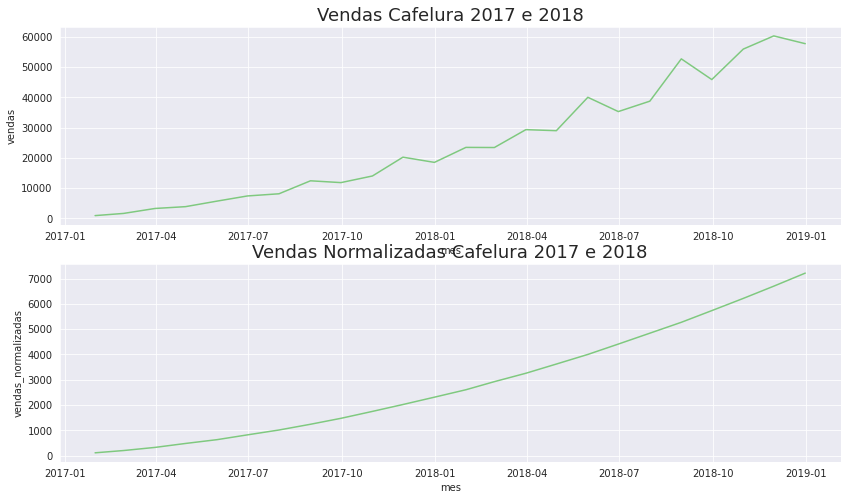

In [67]:
plt.figure(figsize=(14,8))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax =ax

# **Statsmodels**

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

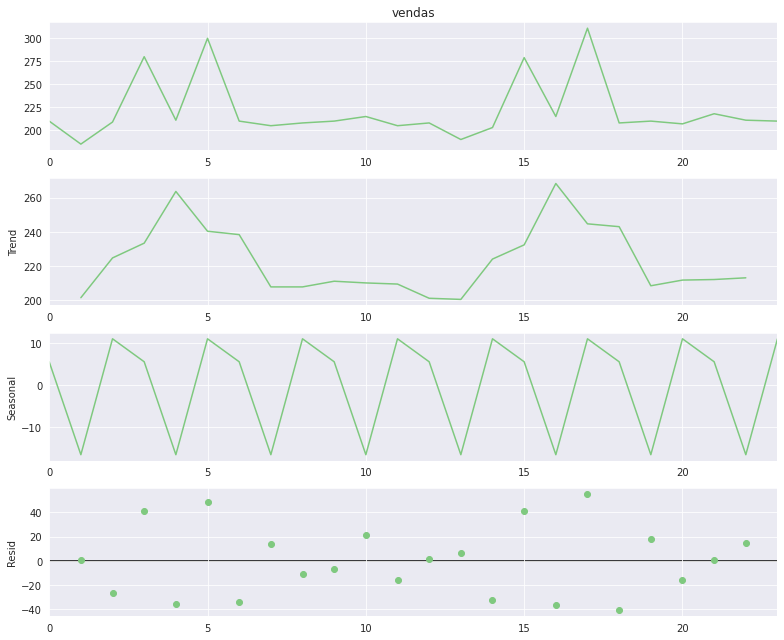

In [69]:
resultado = seasonal_decompose(chocolura['vendas'], period=3)
resultado.plot()


plt.show()

In [70]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [71]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


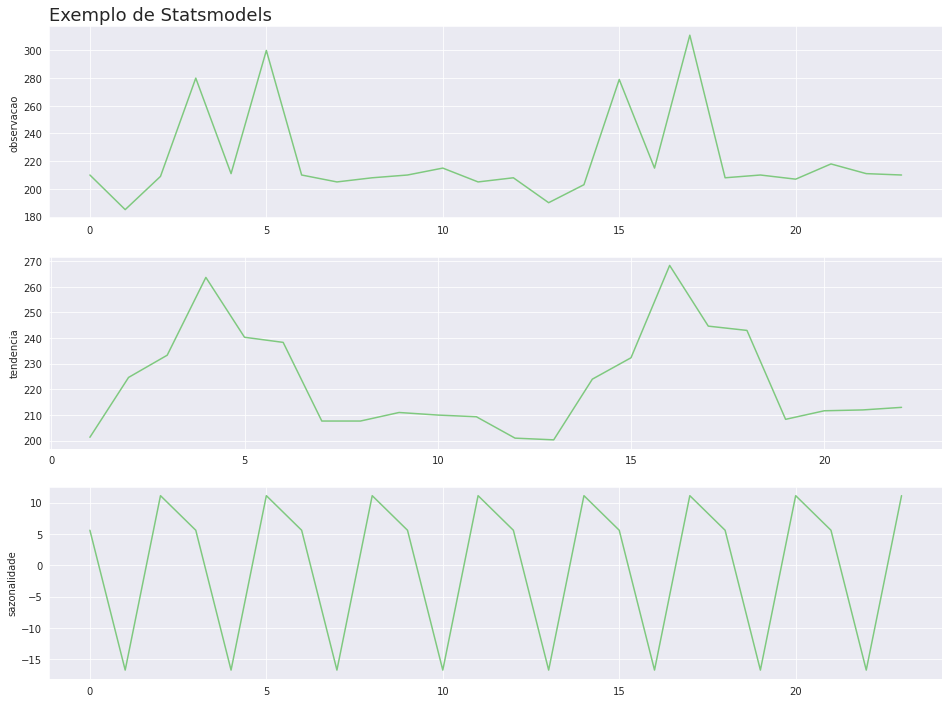

In [72]:
plot_comparacao(resultado.index,'observacao','tendencia','sazonalidade',resultado,'Exemplo de Statsmodels')

Encontrei dados nulos... e agora?

Se tentarmos plotar um gráfico que possui dados nulos, uma mensagem de erro será exibida informando que não temos tipos numéricos para agregar.

Dentre as soluções listadas, temos:

*   Preenchendo os dados nulos com o valor médio da coluna
*   Preenchendo os dados nulos com um valor específico
*   Deletando os dados nulos do DataFrame
*   Preenchendo um dado nulo com o valor anterior ou posterior
*   Interpolando dados nulos com a média

# Alucel - Análise de Vendas

In [73]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [74]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [75]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [76]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [77]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


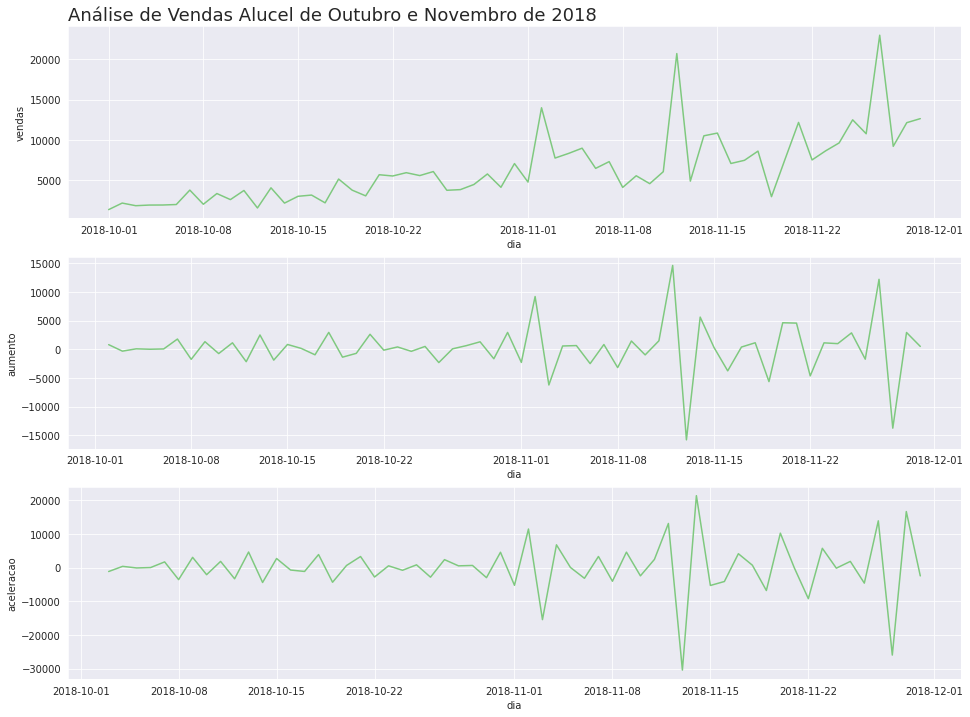

In [78]:
plot_comparacao('dia','vendas','aumento','aceleracao',alucel,'Análise de Vendas Alucel de Outubro e Novembro de 2018')

**Média Móvel**

In [82]:
# técnica de média móvel para normalizar uma série temporal (pega pontos e calcula a média) - .rolling(7)<-número de dias para .mean()
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [81]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


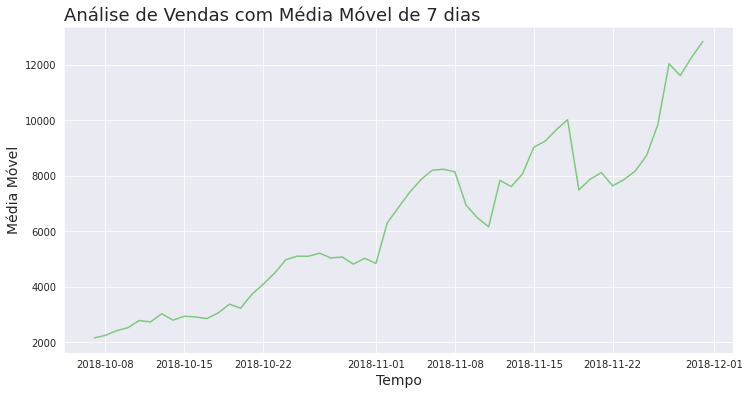

In [83]:
plotar('Análise de Vendas com Média Móvel de 7 dias','Tempo','Média Móvel','dia','media_movel',alucel)

In [84]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

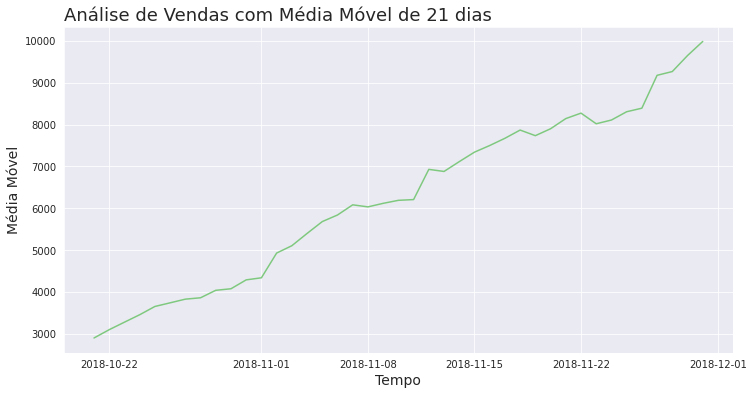

In [85]:
# quanto maior o intervalo de média móvel, mais linear fica, podendo perder alguns pontos de queda drástica
plotar('Análise de Vendas com Média Móvel de 21 dias','Tempo','Média Móvel','dia','media_movel_21',alucel)

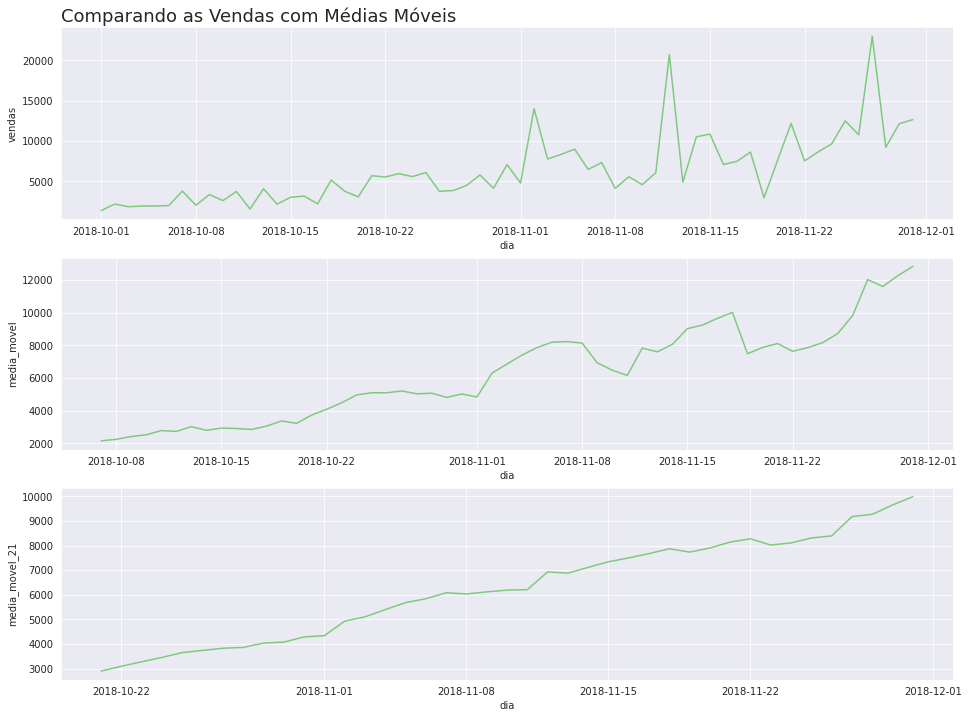

In [86]:
plot_comparacao('dia','vendas','media_movel','media_movel_21',alucel,'Comparando as Vendas com Médias Móveis')